# Continuous Variable Probabilistic Methods for Identifying Outliers Exercises

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Function to start:
Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(df_col, multiplier=1.5):
    '''
    This function  uses the IQR Range Rule to determine the upper
    and lower bound outliers.
    
    '''
    # determine first quartile of selected column
    q1 = df_col.quantile(.25)
    # determine third quartile of selected column
    q3 = df_col.quantile(.75)
    # calculate inner quartile range
    iqr = q3 - q1
    
    # calculate bounds for outliers
    lower_bound = q1 - (iqr * multiplier)
    upper_bound = q3 + (iqr * multiplier)
    
    return lower_bound, upper_bound

###  1. Using lemonade.csv dataset and focusing on continuous variables:


In [3]:
#url for lemonade csv
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
#make df from url
df = pd.read_csv(url)

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


Temperature


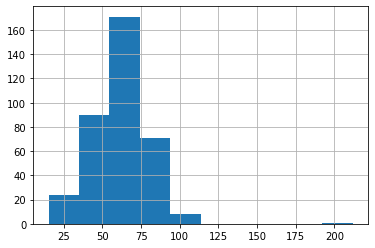

Rainfall


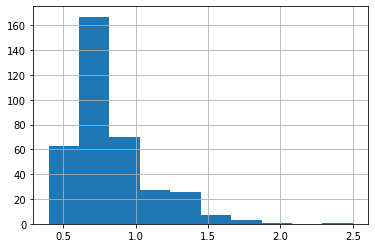

Flyers


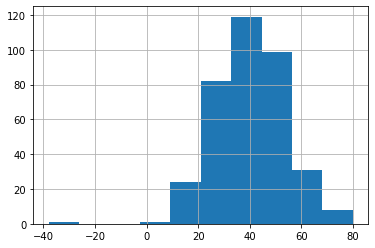

Price


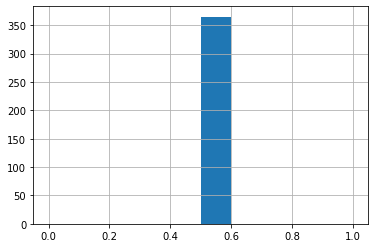

Sales


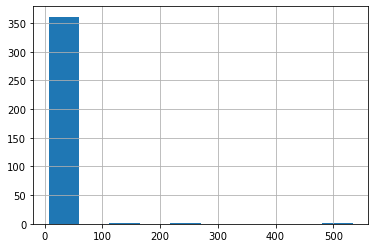

In [6]:
# histograms
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

In [7]:
df.shape

(365, 7)

In [8]:
#boxplots


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flyers'>

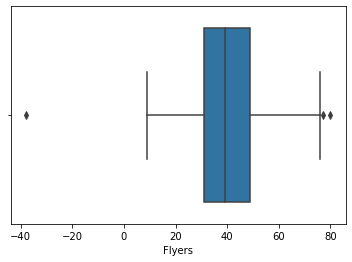

In [9]:
sns.boxplot(df['Flyers'])


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

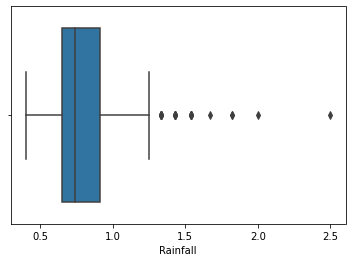

In [10]:
sns.boxplot(df['Rainfall'])

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

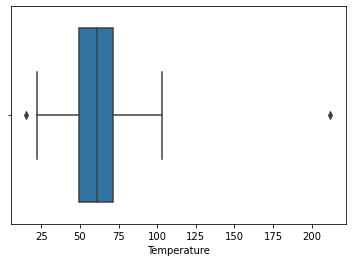

In [11]:
sns.boxplot(df['Temperature'])

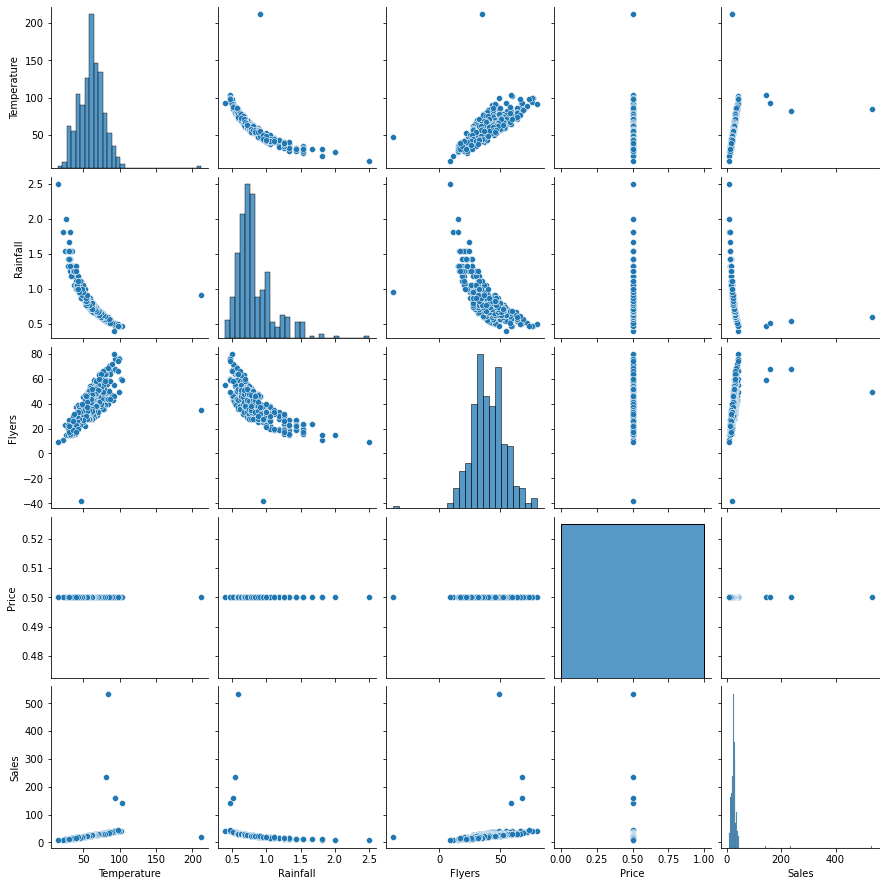

In [12]:
#scatter plots
sns.pairplot(df)

In [13]:
df_stats = df.describe()


In [14]:
df_stats

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


#### Multiplier: 1.5

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

#### Temperature IQR Range Rule

In [15]:
#long example without function to verify function output

In [16]:
df_stats.Temperature

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

In [17]:
#quartile 1
q1 = df.Temperature.quantile(0.25)

In [18]:
q1

49.7

In [19]:
#quartile 3
q3 = df.Temperature.quantile(0.75)

In [20]:

q3

71.7

In [21]:
#interquartile range
iqr = q3 - q1

In [22]:
iqr

22.0

In [23]:
multiplier = 1.5
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [24]:
df[(df['Temperature'] < inner_lower_fence) | (df['Temperature'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [25]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Temperature'], multiplier=1.5)
print( 'Temperature: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Temperature:  lower bound =  16.700000000000003 upper bound =  104.7


#### Rainfall IQR Range Rule

In [26]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Rainfall'], multiplier=1.5)


In [27]:
print( 'Rainfall: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Rainfall:  lower bound =  0.26 upper bound =  1.3


#### Flyers IQR Range Rule

In [28]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Flyers'], multiplier=1.5)
print( 'Flyers: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Flyers:  lower bound =  4.0 upper bound =  76.0


#### Price IQR Range Rule

In [29]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Price'], multiplier=1.5)
print( 'Price: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Price:  lower bound =  0.5 upper bound =  0.5


#### Sales IQR Range Rule

In [30]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Sales'], multiplier=1.5)
print( 'Sales: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Sales:  lower bound =  5.0 upper bound =  45.0


In [ ]:
#histos with lower and upper bounds


#### Multiplier: 3

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

#### Temperature IQR Range Rule

In [31]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Temperature'], multiplier=3)
print( 'Temperature: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Temperature:  lower bound =  -16.299999999999997 upper bound =  137.7


#### Rainfall IQR Range Rule

In [32]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Rainfall'], multiplier=3)
print( 'Rainfall: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Rainfall:  lower bound =  -0.13 upper bound =  1.69


#### Price IQR Range Rule

In [33]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Price'], multiplier=3)
print( 'Price: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Price:  lower bound =  0.5 upper bound =  0.5


#### Sales IQR Range Rule

In [34]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df['Sales'], multiplier=3)
print( 'Sales: ', 'lower bound = ', lower_bound, 'upper bound = ', upper_bound)

Sales:  lower bound =  -10.0 upper bound =  60.0


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [35]:
df['z_score_rainfall'] = (df['Rainfall'] - df['Rainfall'].mean()) /df['Rainfall'].std()

In [36]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_rainfall
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,4.286488
1,1/2/17,Monday,28.9,1.33,15,0.5,13,1.840253
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,1.840253
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.817946
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.635391


In [37]:
df[df.z_score_rainfall.abs() > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_rainfall
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,4.286488
15,1/16/17,Monday,30.6,1.67,24,0.5,12,3.081626
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,3.629291
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,3.629291
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,6.112037


In [38]:
df[df.Flyers < 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_rainfall
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0.452836


In [39]:
df['Flyers'] = df['Flyers'].abs()

<AxesSubplot:>

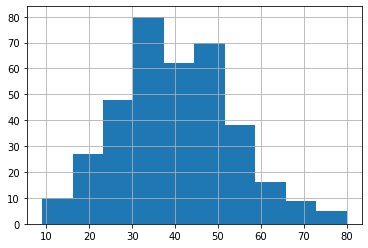

In [40]:
df['Flyers'].hist()

In [41]:
df[df['Temperature'] > 200]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_score_rainfall
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,0.306792
